**Percobaan Model Lain**

### Import Library/Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import joblib
from wordcloud import WordCloud
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_class_weight
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, GlobalAveragePooling1D, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Mengatur agar visualisasi matplotlib muncul di notebook
%matplotlib inline

### Data Understanding

In [2]:
file_id = '1RuAhXM3vJTu5murBe4GqFCdJQz-wPY-x'
url = f'https://drive.google.com/uc?id={file_id}'

df = pd.read_csv(url)

print(df.head())

   Unnamed: 0                                          statement   status  \
0           0  does anyone get anxious about something and th...  anxiety   
1           1  i feel so drained and exhausted i am so tired ...   stress   
2           2  help with constant fatigue  ever since i start...   stress   
3           3  panic attacks when trying to sleep me 10m have...   stress   
4           4  anxiety help hello so i have maybe had like 3 ...  anxiety   

                                statement_translated  statement_length  \
0  adakah yang cemas tentang sesuatu dan kemudian...               307   
1  saya merasa sangat terkuras dan kelelahan sehi...               638   
2  bantuan dengan kelelahan konstan sejak saya mu...               610   
3  serangan panik ketika mencoba tidur saya m bar...               433   
4  kecemasan membantu halo jadi saya mungkin memi...               362   

                                  statement_stemming  
0  adakah cemas lupa cemas cemas menc

In [3]:
print("shape:", df.shape)

shape: (39746, 6)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39746 entries, 0 to 39745
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            39746 non-null  int64 
 1   statement             39746 non-null  object
 2   status                39746 non-null  object
 3   statement_translated  39746 non-null  object
 4   statement_length      39746 non-null  int64 
 5   statement_stemming    39743 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.8+ MB


In [5]:
df.head(10)

,Unnamed: 0,statement,status,statement_translated,statement_length,statement_stemming
0,0,does anyone get anxious about something and th...,anxiety,adakah yang cemas tentang sesuatu dan kemudian...,307,adakah cemas lupa cemas cemas mencoba judulnya...
1,1,i feel so drained and exhausted i am so tired ...,stress,saya merasa sangat terkuras dan kelelahan sehi...,638,terkuras kelelahan lelah serangan panik kecema...
2,2,help with constant fatigue ever since i start...,stress,bantuan dengan kelelahan konstan sejak saya mu...,610,bantuan kelelahan konstan menderita gad panic ...
3,3,panic attacks when trying to sleep me 10m have...,stress,serangan panik ketika mencoba tidur saya m bar...,433,serangan panik mencoba tidur m mengalami seran...
4,4,anxiety help hello so i have maybe had like 3 ...,anxiety,kecemasan membantu halo jadi saya mungkin memi...,362,kecemasan membantu halo memiliki serangan pani...
5,5,probably going to quit meds ive always had thi...,anxiety,mungkin akan berhenti dari obat obatan selalu ...,577,berhenti obat obatan memiliki perasaan obat ob...
6,6,existential anxiety fear of the future i know...,stress,kecemasan eksistensial ketakutan akan masa dep...,584,kecemasan eksistensial ketakutan hidup sehat m...
7,7,mental health ive had severe anxiety for as lo...,stress,kesehatan mental ive memiliki kecemasan yang p...,560,kesehatan mental ive memiliki kecemasan parah ...
8,8,help i sleep 4 hours a day sometimes i wake u...,stress,bantuan saya tidur jam sehari terkadang saya m...,98,bantuan tidur jam sehari terkadang membangunka...
9,9,stomach anxiety hello i’ve been through a lot...,anxiety,kecemasan perut halo saya telah mengalami bany...,399,kecemasan perut halo mengalami stres seminggu ...


In [6]:
print("Jumlah nilai unik per kolom:")
print(df.nunique())

Jumlah nilai unik per kolom:
Unnamed: 0              39746
statement               37890
status                      4
statement_translated    37838
statement_length          777
statement_stemming      37834
dtype: int64


In [7]:
df['status'].value_counts()

,count
status,
normal,15910
depression,13698
anxiety,6142
stress,3996


In [8]:
df.isnull().sum()

,0
Unnamed: 0,0
statement,0
status,0
statement_translated,0
statement_length,0
statement_stemming,3


In [9]:
print("Jumlah missing values per kolom sebelum penanganan:")
print(df.isnull().sum())

Jumlah missing values per kolom sebelum penanganan:
Unnamed: 0              0
statement               0
status                  0
statement_translated    0
statement_length        0
statement_stemming      3
dtype: int64


In [10]:
df.dropna(subset=['statement_stemming'], inplace=True)

print("\nJumlah missing values per kolom setelah penanganan:")
print(df.isnull().sum())

df.info()


Jumlah missing values per kolom setelah penanganan:
Unnamed: 0              0
statement               0
status                  0
statement_translated    0
statement_length        0
statement_stemming      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 39743 entries, 0 to 39745
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            39743 non-null  int64 
 1   statement             39743 non-null  object
 2   status                39743 non-null  object
 3   statement_translated  39743 non-null  object
 4   statement_length      39743 non-null  int64 
 5   statement_stemming    39743 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.1+ MB


### Exploratory Data Analysis



Distribusi kelas pada kolom 'status':
status
normal        15910
depression    13698
anxiety        6140
stress         3995
Name: count, dtype: int64


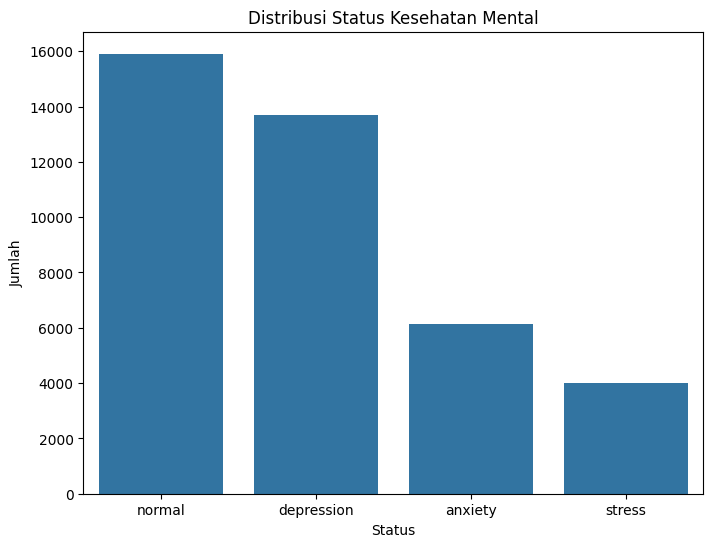

In [11]:
# Menampilkan distribusi kelas pada kolom 'status'
print("\n" + "="*50 + "\n")
print("Distribusi kelas pada kolom 'status':")
print(df['status'].value_counts())

# Visualisasi distribusi kelas
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='status', order=df['status'].value_counts().index)
plt.title('Distribusi Status Kesehatan Mental')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.show()

1. Word Clouds per Kategori Status

membuat satu word cloud untuk setiap status mental (normal, depression, anxiety, stress).

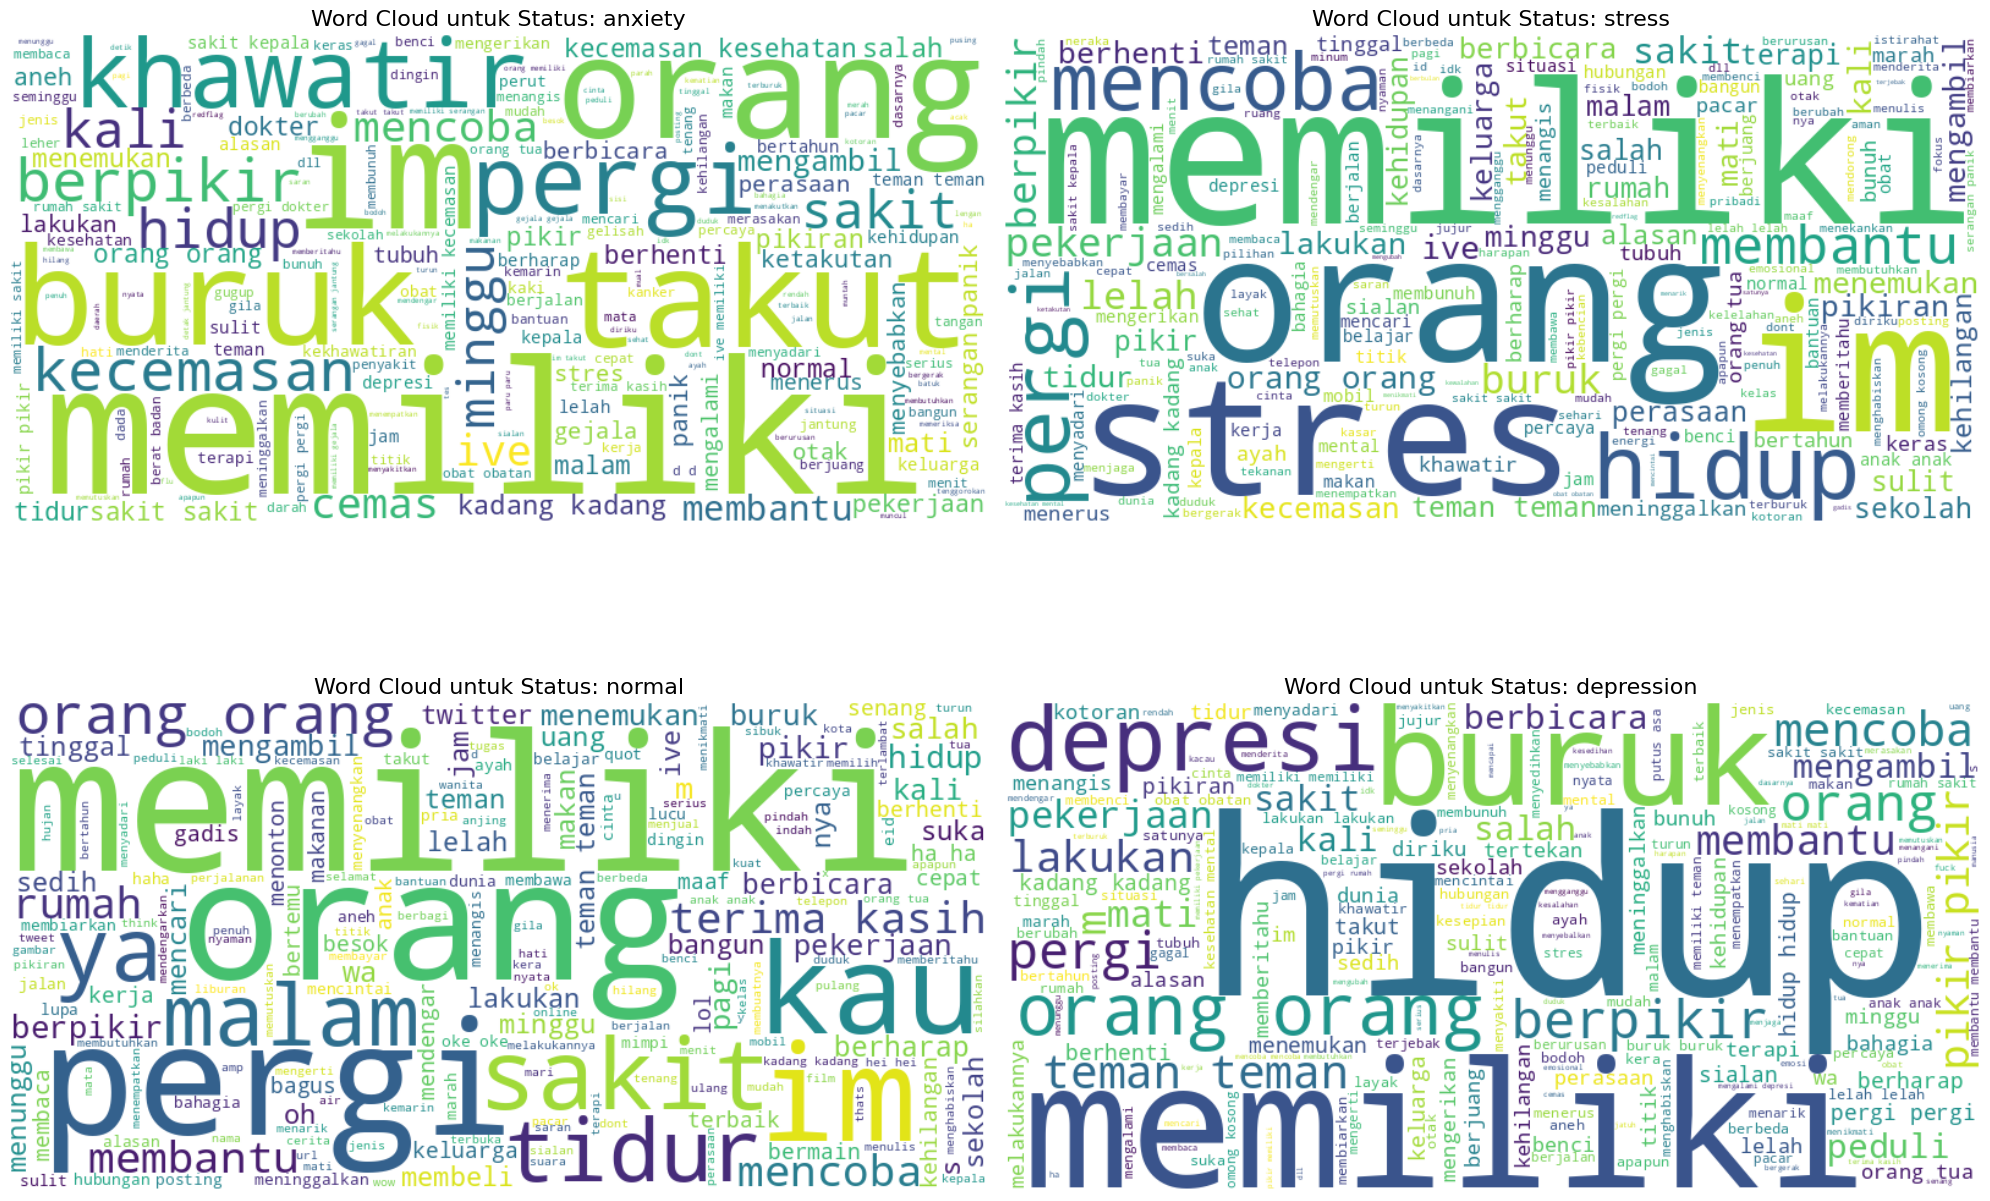

In [12]:
# Mengambil daftar status unik
statuses = df['status'].unique()

plt.figure(figsize=(20, 15))

for i, status in enumerate(statuses):
    # Menggabungkan semua statement_stemming untuk status saat ini
    text_corpus = " ".join(df[df['status'] == status]['statement_stemming'].astype(str))

    # Membuat word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_corpus)

    plt.subplot(2, 2, i+1) # Ada 4 status, jadi grid 2x2
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud untuk Status: {status}', fontsize=16)

plt.tight_layout()
plt.show()

2. Analisis Frekuensi Kata (Top N Words)

Pertama, kita lihat kata-kata yang paling sering muncul secara keseluruhan.

In [13]:
# Menggabungkan semua statement_stemming menjadi satu teks besar
all_text = " ".join(df['statement_stemming'].astype(str))

# Memecah teks menjadi kata-kata
all_words = all_text.split()

# Menghitung frekuensi setiap kata
word_counts = Counter(all_words)

# Menampilkan N kata paling umum (misalnya, Top 20)
top_n = 20
print(f"Top {top_n} kata paling umum secara keseluruhan:")
for word, count in word_counts.most_common(top_n):
    print(f"{word}: {count}")

print("\n" + "="*50 + "\n")

Top 20 kata paling umum secara keseluruhan:
orang: 21021
memiliki: 18613
i: 13077
pergi: 12059
hidup: 11746
sakit: 9201
teman: 8519
pikir: 7548
buruk: 7308
mencoba: 6624
depresi: 6538
berpikir: 6146
kecemasan: 5746
tidur: 5273
im: 5058
membantu: 5017
lakukan: 4814
pekerjaan: 4779
takut: 4300
kadang: 4295




In [14]:
n_top_words_per_category = 15 # Jumlah kata teratas yang ingin ditampilkan per kategori

for status in statuses:
    print(f"Top {n_top_words_per_category} kata untuk status: {status}")
    # Menggabungkan semua statement_stemming untuk status saat ini
    status_text = " ".join(df[df['status'] == status]['statement_stemming'].astype(str))
    status_words = status_text.split()
    status_word_counts = Counter(status_words)

    for word, count in status_word_counts.most_common(n_top_words_per_category):
        print(f"  {word}: {count}")
    print("-" * 30)

Top 15 kata untuk status: anxiety
  memiliki: 4592
  sakit: 3584
  orang: 3223
  kecemasan: 3062
  pergi: 2400
  im: 2044
  takut: 1933
  buruk: 1681
  khawatir: 1585
  berpikir: 1348
  hidup: 1260
  pikir: 1243
  i: 1237
  kadang: 1176
  kesehatan: 1121
------------------------------
Top 15 kata untuk status: stress
  orang: 2466
  memiliki: 1885
  stres: 1790
  im: 1443
  hidup: 1270
  pergi: 1259
  sakit: 1179
  lelah: 1053
  i: 1022
  mencoba: 977
  teman: 927
  pekerjaan: 916
  membantu: 838
  buruk: 821
  berpikir: 761
------------------------------
Top 15 kata untuk status: normal
  orang: 1935
  i: 1892
  memiliki: 1306
  pergi: 1033
  kau: 661
  im: 653
  sakit: 613
  teman: 604
  tidur: 548
  rumah: 507
  malam: 493
  ya: 481
  anak: 460
  kasih: 442
  pagi: 406
------------------------------
Top 15 kata untuk status: depression
  orang: 13397
  memiliki: 10830
  i: 8926
  hidup: 8861
  pergi: 7367
  teman: 6024
  depresi: 5781
  pikir: 5490
  buruk: 4510
  mencoba: 4269
  sa

### Data Preparation

In [15]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Melakukan encoding pada kolom 'status'
df['status_encoded'] = label_encoder.fit_transform(df['status'])

# Menampilkan beberapa baris untuk melihat hasil encoding dan kolom baru
print("DataFrame dengan kolom 'status_encoded':")
print(df[['status', 'status_encoded']].head())

print("\n" + "="*50 + "\n")

status_mapping = {index: label for index, label in enumerate(label_encoder.classes_)}
print("Pemetaan Label Kelas (Angka -> Teks Asli):")
print(status_mapping)

print("\nJumlah unik di 'status_encoded':")
print(df['status_encoded'].value_counts())

DataFrame dengan kolom 'status_encoded':
    status  status_encoded
0  anxiety               0
1   stress               3
2   stress               3
3   stress               3
4  anxiety               0


Pemetaan Label Kelas (Angka -> Teks Asli):
{0: 'anxiety', 1: 'depression', 2: 'normal', 3: 'stress'}

Jumlah unik di 'status_encoded':
status_encoded
2    15910
1    13698
0     6140
3     3995
Name: count, dtype: int64


In [16]:
# Inisialisasi TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))

# Melakukan fit_transform pada kolom 'statement_stemming'
X_tfidf = tfidf_vectorizer.fit_transform(df['statement_stemming'])

# X_tfidf adalah sparse matrix, kita bisa lihat bentuknya
print("\n" + "="*50 + "\n")
print("Bentuk matriks TF-IDF (jumlah_sampel, jumlah_fitur):")
print(X_tfidf.shape)



Bentuk matriks TF-IDF (jumlah_sampel, jumlah_fitur):
(39743, 10000)


In [17]:
X = X_tfidf # Fitur adalah matriks TF-IDF dari statement_stemming
y = df['status_encoded'] # Target adalah kolom status yang sudah di-encode

# Membagi data menjadi data latih dan data uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\n" + "="*50 + "\n")
print("Bentuk data latih (X_train):", X_train.shape)
print("Bentuk data uji (X_test):", X_test.shape)
print("Bentuk target latih (y_train):", y_train.shape)
print("Bentuk target uji (y_test):", y_test.shape)

print("\nDistribusi kelas pada y_train:")
print(pd.Series(y_train).value_counts(normalize=True).sort_index())

print("\nDistribusi kelas pada y_test:")
print(pd.Series(y_test).value_counts(normalize=True).sort_index())

print("\nDistribusi kelas pada y keseluruhan (untuk perbandingan):")
print(y.value_counts(normalize=True).sort_index())



Bentuk data latih (X_train): (31794, 10000)
Bentuk data uji (X_test): (7949, 10000)
Bentuk target latih (y_train): (31794,)
Bentuk target uji (y_test): (7949,)

Distribusi kelas pada y_train:
status_encoded
0    0.154495
1    0.344656
2    0.400327
3    0.100522
Name: proportion, dtype: float64

Distribusi kelas pada y_test:
status_encoded
0    0.154485
1    0.344697
2    0.400302
3    0.100516
Name: proportion, dtype: float64

Distribusi kelas pada y keseluruhan (untuk perbandingan):
status_encoded
0    0.154493
1    0.344664
2    0.400322
3    0.100521
Name: proportion, dtype: float64


In [18]:
# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

print("Distribusi kelas pada y_train SEBELUM SMOTE:")
print(pd.Series(y_train).value_counts().sort_index())

# Menerapkan SMOTE hanya pada data latih
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\n" + "="*50 + "\n")
print("Bentuk X_train setelah SMOTE:", X_train_resampled.shape)
print("Bentuk y_train setelah SMOTE:", y_train_resampled.shape)

print("\nDistribusi kelas pada y_train SETELAH SMOTE:")
print(pd.Series(y_train_resampled).value_counts().sort_index())

Distribusi kelas pada y_train SEBELUM SMOTE:
status_encoded
0     4912
1    10958
2    12728
3     3196
Name: count, dtype: int64


Bentuk X_train setelah SMOTE: (50912, 10000)
Bentuk y_train setelah SMOTE: (50912,)

Distribusi kelas pada y_train SETELAH SMOTE:
status_encoded
0    12728
1    12728
2    12728
3    12728
Name: count, dtype: int64


In [21]:
df['statement_stemming'] = df['statement_stemming'].astype(str)

# Mendefinisikan Fitur (X) dan Target (y)
X = df['statement_stemming']
y = df['status_encoded']

# Mengingat kembali mapping kita untuk referensi
# {0: 'anxiety', 1: 'depression', 2: 'normal', 3: 'stress'}
print("Bentuk Fitur (X):", X.shape)
print("Bentuk Target (y):", y.shape)

Bentuk Fitur (X): (39743,)
Bentuk Target (y): (39743,)


In [22]:
# Membagi data dengan rasio 80:20, stratify berdasarkan y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Jumlah data latih:", len(X_train))
print("Jumlah data uji:", len(X_test))

Jumlah data latih: 31794
Jumlah data uji: 7949


In [23]:
# Inisialisasi Tokenizer
vocab_size = 10000  # Jumlah kata unik yang ingin digunakan
oov_token = "<OOV>" # Token untuk kata yang tidak ada dalam vocabulary

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)

# Membuat vocabulary HANYA dari data latih (X_train)
tokenizer.fit_on_texts(X_train)

# Mengubah teks menjadi urutan angka (sequences) untuk data latih dan uji
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

In [24]:
# Menentukan panjang maksimal sekuens (padding)
max_length = 200
padding_type = 'post' # Menambahkan padding di akhir kalimat
trunc_type = 'post'   # Memotong kalimat yang terlalu panjang dari akhir

# Menerapkan padding pada data latih dan uji
padded_train = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
padded_test = pad_sequences(test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print("\nBentuk data latih setelah padding:", padded_train.shape)
print("Bentuk data uji setelah padding:", padded_test.shape)


Bentuk data latih setelah padding: (31794, 200)
Bentuk data uji setelah padding: (7949, 200)


In [25]:
# Menghitung bobot kelas dari data latih (y_train)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Mengubah menjadi format dictionary yang bisa diterima oleh Keras
class_weights_dict = dict(enumerate(class_weights))

print("\nBobot Kelas (Class Weights) yang akan digunakan:")
print(class_weights_dict)
# Kelas dengan sampel lebih sedikit akan memiliki bobot lebih besar


Bobot Kelas (Class Weights) yang akan digunakan:
{0: np.float64(1.61817996742671), 1: np.float64(0.7253604672385472), 2: np.float64(0.6244893148962917), 3: np.float64(2.4870150187734668)}


### Modelling

##### Logistic Regression

In [19]:
# Inisialisasi model Logistic Regression
lr_model = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

# Melatih model
print("\n" + "="*50 + "\n")
print("Melatih model Logistic Regression...")
lr_model.fit(X_train_resampled, y_train_resampled)
print("Model Logistic Regression berhasil dilatih.")

# Melakukan prediksi pada data uji
y_pred_lr = lr_model.predict(X_test)

# Mengevaluasi model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"\nAccuracy Logistic Regression: {accuracy_lr:.4f}")

print("\nClassification Report Logistic Regression:")
target_names_report = [status_mapping[i] for i in sorted(status_mapping.keys())]
print(classification_report(y_test, y_pred_lr, target_names=target_names_report))



Melatih model Logistic Regression...
Model Logistic Regression berhasil dilatih.

Accuracy Logistic Regression: 0.7842

Classification Report Logistic Regression:
              precision    recall  f1-score   support

     anxiety       0.67      0.72      0.69      1228
  depression       0.84      0.83      0.83      2740
      normal       0.90      0.82      0.86      3182
      stress       0.46      0.60      0.53       799

    accuracy                           0.78      7949
   macro avg       0.72      0.74      0.73      7949
weighted avg       0.80      0.78      0.79      7949



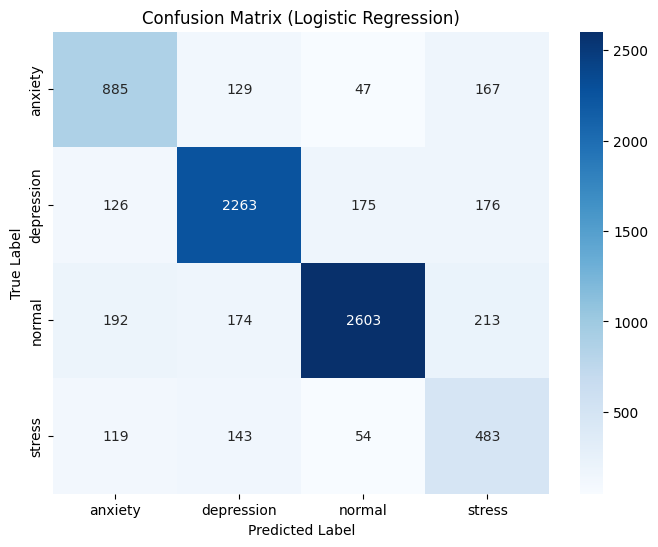

In [20]:
# Membuat confusion matrix untuk Logistic Regression
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr, labels=sorted(status_mapping.keys()))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt="d", cmap="Blues",
            xticklabels=[status_mapping[i] for i in sorted(status_mapping.keys())],
            yticklabels=[status_mapping[i] for i in sorted(status_mapping.keys())])
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

##### Neural Network

In [26]:
# Menetukan parameter untuk model
embedding_dim = 16  # Dimensi vektor untuk setiap kata
num_classes = 4     # Jumlah kelas target

# Membangun model menggunakan Keras Sequential API
model = tf.keras.Sequential([
    # 1. Embedding Layer
    tf.keras.layers.Embedding(input_dim=vocab_size,
                              output_dim=embedding_dim,
                              input_length=max_length),

    # 2. GlobalAveragePooling1D Layer
    tf.keras.layers.GlobalAveragePooling1D(),

    # 3. Hidden Layer
    tf.keras.layers.Dense(24, activation='relu'),

    # 4. Dropout Layer
    tf.keras.layers.Dropout(0.5), # Dropout 50% untuk regularisasi

    # 5. Output Layer
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Mengompilasi model
model.compile(
    loss='sparse_categorical_crossentropy', # Loss function untuk klasifikasi multikelas dengan target integer
    optimizer='adam',                       # Optimizer yang populer dan bekerja baik di banyak kasus
    metrics=['accuracy']                    # Metrik yang ingin kita pantau
)

# Menampilkan ringkasan arsitektur model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Menentukan jumlah epochs
num_epochs = 50

# Inisialisasi callback EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True)

# Melatih model
history = model.fit(
    padded_train,
    y_train,
    epochs=num_epochs,
    validation_data=(padded_test, y_test),
    class_weight=class_weights_dict, # Menggunakan bobot kelas yang sudah dihitung
    callbacks=[early_stopping],     # Menggunakan callback EarlyStopping
    verbose=2 # Mengatur agar output per epoch lebih ringkas
)

Epoch 1/50
994/994 - 4s - 4ms/step - accuracy: 0.4296 - loss: 1.3270 - val_accuracy: 0.6381 - val_loss: 1.0760
Epoch 2/50
994/994 - 5s - 5ms/step - accuracy: 0.5896 - loss: 1.1440 - val_accuracy: 0.6640 - val_loss: 0.9214
Epoch 3/50
994/994 - 3s - 3ms/step - accuracy: 0.6509 - loss: 1.0314 - val_accuracy: 0.7127 - val_loss: 0.9280
Epoch 4/50
994/994 - 2s - 2ms/step - accuracy: 0.6823 - loss: 0.9609 - val_accuracy: 0.7396 - val_loss: 0.7657
Epoch 5/50
994/994 - 3s - 3ms/step - accuracy: 0.6986 - loss: 0.9054 - val_accuracy: 0.7337 - val_loss: 0.8356
Epoch 6/50
994/994 - 3s - 3ms/step - accuracy: 0.7098 - loss: 0.8689 - val_accuracy: 0.7172 - val_loss: 0.7760
Epoch 7/50
994/994 - 3s - 3ms/step - accuracy: 0.7313 - loss: 0.8239 - val_accuracy: 0.7928 - val_loss: 0.6252
Epoch 8/50
994/994 - 2s - 2ms/step - accuracy: 0.7507 - loss: 0.7796 - val_accuracy: 0.7938 - val_loss: 0.6218
Epoch 9/50
994/994 - 3s - 3ms/step - accuracy: 0.7631 - loss: 0.7585 - val_accuracy: 0.7873 - val_loss: 0.6656
E

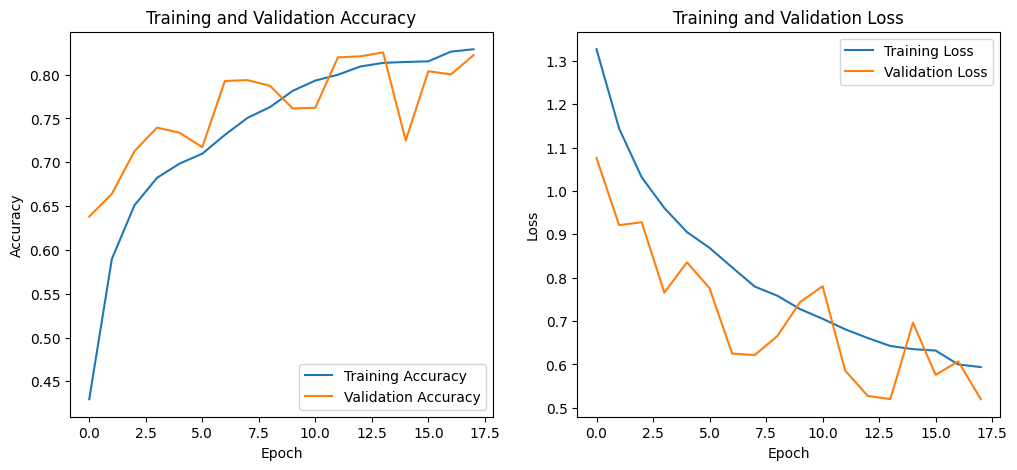

In [28]:
# Membuat plot akurasi
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Membuat plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

249/249 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Classification Report Final Model (TensorFlow):
              precision    recall  f1-score   support

     anxiety       0.80      0.68      0.73      1228
  depression       0.85      0.86      0.85      2740
      normal       0.91      0.91      0.91      3182
      stress       0.50      0.58      0.54       799

    accuracy                           0.83      7949
   macro avg       0.76      0.76      0.76      7949
weighted avg       0.83      0.83      0.83      7949


Confusion Matrix Final Model (TensorFlow):


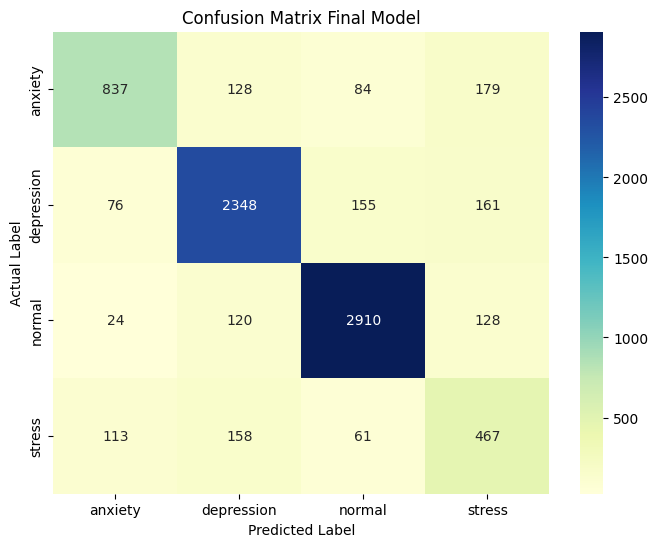

In [29]:
# Mendapatkan prediksi dalam bentuk probabilitas
y_pred_probs = model.predict(padded_test)

# Mengubah probabilitas menjadi label kelas tunggal
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Mencetak laporan klasifikasi
print("Classification Report Final Model (TensorFlow):")
target_names_report = [status_mapping[i] for i in sorted(status_mapping.keys())]
print(classification_report(y_test, y_pred_labels, target_names=target_names_report))

# Menampilkan confusion matrix
print("\nConfusion Matrix Final Model (TensorFlow):")
cm = confusion_matrix(y_test, y_pred_labels)
cm_df = pd.DataFrame(cm, index=target_names_report, columns=target_names_report)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix Final Model')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

### Inference

Logistic Regression

In [30]:
# 1. Simpan model SVC
joblib.dump(lr_model, 'lr_model.joblib')

# 2. Simpan TF-IDF Vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')

print("Model LR dan TF-IDF Vectorizer berhasil disimpan!")

Model LR dan TF-IDF Vectorizer berhasil disimpan!


In [31]:
# --- 1. Muat Semua Komponen yang Diperlukan ---
print("Memuat model lr dan vectorizer...")
try:
    # Muat model lr yang sudah dilatih
    loaded_lr_model = joblib.load('lr_model.joblib')

    # Muat TF-IDF Vectorizer yang sudah di-fit
    loaded_tfidf_vectorizer = joblib.load('tfidf_vectorizer.joblib')

    print("Model dan vectorizer berhasil dimuat.")
except Exception as e:
    print(f"Error saat memuat file: {e}")
    print("Pastikan file 'lr_model.joblib' dan 'tfidf_vectorizer.joblib' ada di direktori yang sama.")

# --- 2. Definisi Ulang Mapping (sesuai dengan saat training) ---
label_map = {0: 'anxiety', 1: 'depression', 2: 'normal', 3: 'stress'}

# --- 3. Fungsi Inference untuk Model lr ---
def predict_status_lr(text_statement, model, vectorizer):
  """
  Fungsi untuk memprediksi status kesehatan mental menggunakan model Scikit-learn.
  """
  # 1. Ubah teks menjadi vektor TF-IDF menggunakan vectorizer yang dimuat
  # Gunakan .transform() bukan .fit_transform()
  text_vector = vectorizer.transform([text_statement])

  # 2. melakukan prediksi dengan model yang dimuat
  prediction_index = model.predict(text_vector)[0]

  # 3. mengambil nama kelas dari hasil prediksi
  predicted_status = label_map[prediction_index]

  return predicted_status

# --- 4. Penggunaan ---
if 'loaded_lr_model' in locals() and 'loaded_tfidf_vectorizer' in locals():

    statement1 = "Gue lagi capek banget akhir-akhir ini, rasanya kayak semua hal numpuk jadi satu. Tugas kuliah belum kelar, kerjaan part-time makin banyak, belum lagi masalah keluarga di rumah. Gue ngerasa kayak ditekan dari semua arah dan jujur aja, ini bikin gue stres parah. Kadang sampai nggak tahu harus mulai dari mana, cuma bisa bengong sambil mikir 'kapan semua ini selesai sih?'."

    statement2 = "Belakangan ini gue ngerasa hampa banget. Kayak hidup tuh jalan terus, tapi gue cuma ngikutin aja tanpa arah. Hal-hal yang dulu gue suka, sekarang malah bikin gue malas gerak. Gue lebih sering ngurung diri di kamar, tidur seharian, atau cuma nangis tiba-tiba tanpa alasan jelas. Gue tahu ini bukan sekadar capek, tapi kayak ada beban berat yang terus nempel di dada. Rasanya gue lagi masuk ke fase depresi tapi nggak tahu harus cerita ke siapa."

    statement3 = "Gue tuh orangnya gampang banget overthinking. Tiap ada hal baru, apalagi yang harus gue hadapi sendiri, gue langsung panik. Jantung deg-degan, tangan dingin, dan pikiran langsung kemana-mana mikirin hal buruk yang belum tentu kejadian. Gue tahu ini kecemasan, dan gue udah coba atur napas, coba tenangin diri, tapi tetep aja susah. Bahkan hal kecil kayak bales chat orang aja kadang bisa bikin gue anxiety sendiri."


    # Prediksi untuk setiap statement
    pred_1 = predict_status_lr(statement1, loaded_lr_model, loaded_tfidf_vectorizer)
    print(f"Statement: \"{statement1}\"")
    print(f"--> Hasil Prediksi lr: {pred_1}\n")

    pred_2 = predict_status_lr(statement2, loaded_lr_model, loaded_tfidf_vectorizer)
    print(f"Statement: \"{statement2}\"")
    print(f"--> Hasil Prediksi lr: {pred_2}\n")

    pred_3 = predict_status_lr(statement3, loaded_lr_model, loaded_tfidf_vectorizer)
    print(f"Statement: \"{statement3}\"")
    print(f"--> Hasil Prediksi lr: {pred_3}\n")
else:
    print("Proses inferensi tidak bisa dilanjutkan karena model atau vectorizer gagal dimuat.")

Memuat model lr dan vectorizer...
Model dan vectorizer berhasil dimuat.
Statement: "Gue lagi capek banget akhir-akhir ini, rasanya kayak semua hal numpuk jadi satu. Tugas kuliah belum kelar, kerjaan part-time makin banyak, belum lagi masalah keluarga di rumah. Gue ngerasa kayak ditekan dari semua arah dan jujur aja, ini bikin gue stres parah. Kadang sampai nggak tahu harus mulai dari mana, cuma bisa bengong sambil mikir 'kapan semua ini selesai sih?'."
--> Hasil Prediksi lr: stress

Statement: "Belakangan ini gue ngerasa hampa banget. Kayak hidup tuh jalan terus, tapi gue cuma ngikutin aja tanpa arah. Hal-hal yang dulu gue suka, sekarang malah bikin gue malas gerak. Gue lebih sering ngurung diri di kamar, tidur seharian, atau cuma nangis tiba-tiba tanpa alasan jelas. Gue tahu ini bukan sekadar capek, tapi kayak ada beban berat yang terus nempel di dada. Rasanya gue lagi masuk ke fase depresi tapi nggak tahu harus cerita ke siapa."
--> Hasil Prediksi lr: depression

Statement: "Gue tuh 

Neural Network

In [32]:
nama_file_model = 'final_mental_health_model.h5'

# Menyimpan model lengkap (arsitektur, bobot, dan state optimizer) ke dalam satu file
model.save(nama_file_model)

print(f"Model berhasil disimpan sebagai '{nama_file_model}'")

Model berhasil disimpan sebagai 'final_mental_health_model.h5'


In [33]:
# Simpan tokenizer ke sebuah file
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

print("Tokenizer berhasil disimpan sebagai 'tokenizer.pickle'")

Tokenizer berhasil disimpan sebagai 'tokenizer.pickle'


In [37]:
# --- 1. Muat Semua Komponen yang Diperlukan ---
print("Memuat model dan tokenizer...")
try:
    # Muat model H5 yang sudah dilatih
    loaded_model = tf.keras.models.load_model('final_mental_health_model.h5')

    # Muat tokenizer yang sudah di-fit
    with open('tokenizer.pickle', 'rb') as handle:
        loaded_tokenizer = pickle.load(handle)

    print("Model dan tokenizer berhasil dimuat.")
except Exception as e:
    print(f"Error saat memuat file: {e}")
    print("Pastikan file 'final_mental_health_model.h5' dan 'tokenizer.pickle' ada di direktori yang sama.")

# --- 2. Definisikan Ulang Parameter & Mapping (HARUS SAMA dengan saat training) ---
max_length = 200
padding_type = 'post'
trunc_type = 'post'
label_map = {0: 'anxiety', 1: 'depression', 2: 'normal', 3: 'stress'}

# --- 3. Fungsi Inference
def predict_status(text_statement, model, tokenizer):
  """
  Fungsi untuk memprediksi status kesehatan mental dari sebuah statement teks.
  """
  # 1. Ubah teks menjadi sequence menggunakan tokenizer yang dimuat
  sequence = tokenizer.texts_to_sequences([text_statement])

  # 2. Lakukan padding
  padded_sequence = pad_sequences(sequence, maxlen=max_length, padding=padding_type, truncating=trunc_type)

  # 3. Lakukan prediksi dengan model yang dimuat
  prediction_probs = model.predict(padded_sequence)
  predicted_label_index = np.argmax(prediction_probs)

  # 4. Ambil nama kelas dari hasil prediksi
  predicted_status = label_map[predicted_label_index]

  # 5. Dapatkan persentase keyakinan
  confidence_score = np.max(prediction_probs) * 100

  return predicted_status, confidence_score

# --- 4. Contoh Penggunaan ---
# Ganti teks di bawah ini dengan cerita atau pernyataan apa pun
statement_1 = "hidup ingin menangis lelah cocok perbuatan hukumannya cocok kejahatan hidup adil orang menghargainya menempatkan menyarankan orang sepotong seumur hidup sakit"
statement_2 = "Gue tuh orangnya gampang banget overthinking. Tiap ada hal baru, apalagi yang harus gue hadapi sendiri, gue langsung panik. Jantung deg-degan, tangan dingin, dan pikiran langsung kemana-mana mikirin hal buruk yang belum tentu kejadian. Gue tahu ini kecemasan, dan gue udah coba atur napas, coba tenangin diri, tapi tetep aja susah. Bahkan hal kecil kayak bales chat orang aja kadang bisa bikin gue anxiety sendiri."

# List semua statement untuk diprediksi
statements = [statement_1, statement_2]

# Lakukan prediksi untuk setiap statement
if 'loaded_model' in locals() and 'loaded_tokenizer' in locals():
    for i, statement in enumerate(statements):
        pred_status, pred_conf = predict_status(statement, loaded_model, loaded_tokenizer)
        print(f"Statement {i+1}: \"{statement}\"")
        print(f"--> Hasil Prediksi: {pred_status} (Keyakinan: {pred_conf:.2f}%)\n")
else:
    print("Proses inferensi tidak bisa dilanjutkan karena model atau tokenizer gagal dimuat.")

Memuat model dan tokenizer...
Model dan tokenizer berhasil dimuat.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Statement 1: "hidup ingin menangis lelah cocok perbuatan hukumannya cocok kejahatan hidup adil orang menghargainya menempatkan menyarankan orang sepotong seumur hidup sakit"
--> Hasil Prediksi: depression (Keyakinan: 43.63%)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Statement 2: "Gue tuh orangnya gampang banget overthinking. Tiap ada hal baru, apalagi yang harus gue hadapi sendiri, gue langsung panik. Jantung deg-degan, tangan dingin, dan pikiran langsung kemana-mana mikirin hal buruk yang belum tentu kejadian. Gue tahu ini kecemasan, dan gue udah coba atur napas, coba tenangin diri, tapi tetep aja susah. Bahkan hal kecil kayak bales chat orang aja kadang bisa bikin gue anxiety sendiri."
--> Hasil Prediksi: anxiety (Keyakinan: 99.55%)

